In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
dataset = pd.read_csv('./data/kaggle/diabetes2_train.csv')




In [2]:
dataset_select = dataset.iloc[:, 0:9]



In [3]:
X_train =  dataset.loc[:,'Pregnancies':'Age'].values
y_train = dataset.loc[:, 'Outcome'].values




In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)



In [5]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y_train = label.fit_transform(y_train)


In [6]:
features = list(dataset)
X_train = dataset.loc[:, features].values





In [7]:
from sklearn.preprocessing import MinMaxScaler
normal_sc = MinMaxScaler(feature_range = (0,1))
X_train = normal_sc.fit_transform(X_train)





In [8]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 9, sigma = 3.0, learning_rate = 0.5)
som.random_weights_init(X_train)
som.train_random(data = X_train, num_iteration = 1000)



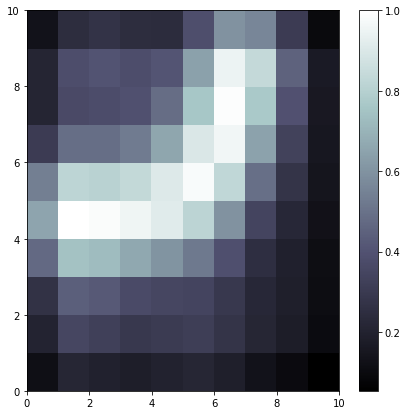

In [9]:
plt.figure(figsize=(7, 7))
plt.bone()
plt.pcolor(som.distance_map().T)
plt.colorbar()
plt.savefig('./som_scale.png')


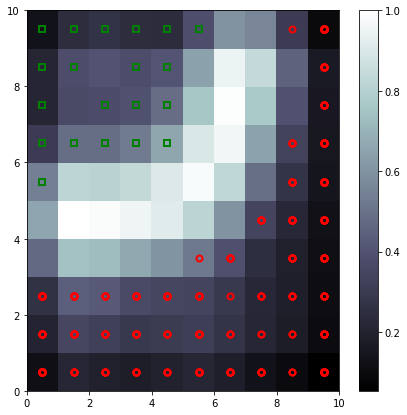

In [10]:
plt.figure(figsize=(7, 7))
plt.bone()
plt.pcolor(som.distance_map().T)
plt.colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X_train):
    w = som.winner(x)
    plt.plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y_train[i]],
         markeredgecolor = colors[y_train[i]],
         markerfacecolor = 'None',
         markersize = 6,
         markeredgewidth = 2)
    plt.savefig('./data/som_scale_2.png')
plt.show()


